# **Visualization Report**

Step 1: Import Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from collections import Counter

Step 2: Silence Future Warnings

In [12]:
warnings.filterwarnings("ignore", category=FutureWarning)

Step 3: Load Data

In [15]:
df_pandas = pd.read_csv("pandas_optimized.csv")
df_duckdb = pd.read_csv("duckdb_optimized.csv")
df_polars = pd.read_csv("polars_optimized.csv")

Step 4: Combine and Format Data

In [16]:
df_pandas["Method"] = "Pandas Optimization"
df_duckdb["Method"] = "DuckDB Optimization"
df_polars["Method"] = "Polars Optimization"

df_combined = pd.concat([ df_pandas, df_duckdb, df_polars], ignore_index=True)

# Use consistent order
method_order = [ "Pandas Optimization", "DuckDB Optimization", "Polars Optimization"]
df_combined["Method"] = pd.Categorical(df_combined["Method"], categories=method_order, ordered=True)

Step 5: Set Plotting Style

In [17]:
sns.set(style="darkgrid", context="notebook")
colors = sns.color_palette("viridis", len(method_order))

Step 6: Define Metrics to Plot and Analyze

In [18]:
metrics = {
    "Total Processing Time (seconds)": ("Processing Time (s)", "lower is better"),
    "CPU Usage (%)": ("CPU Usage (%)", "lower is better"),
    "Memory Usage (MB)": ("Memory Usage (MB)", "lower is better"),
    "Throughput (records/second)": ("Throughput (records/sec)", "higher is better")
}

Step 7: Create Plots and Identify Best Optimization

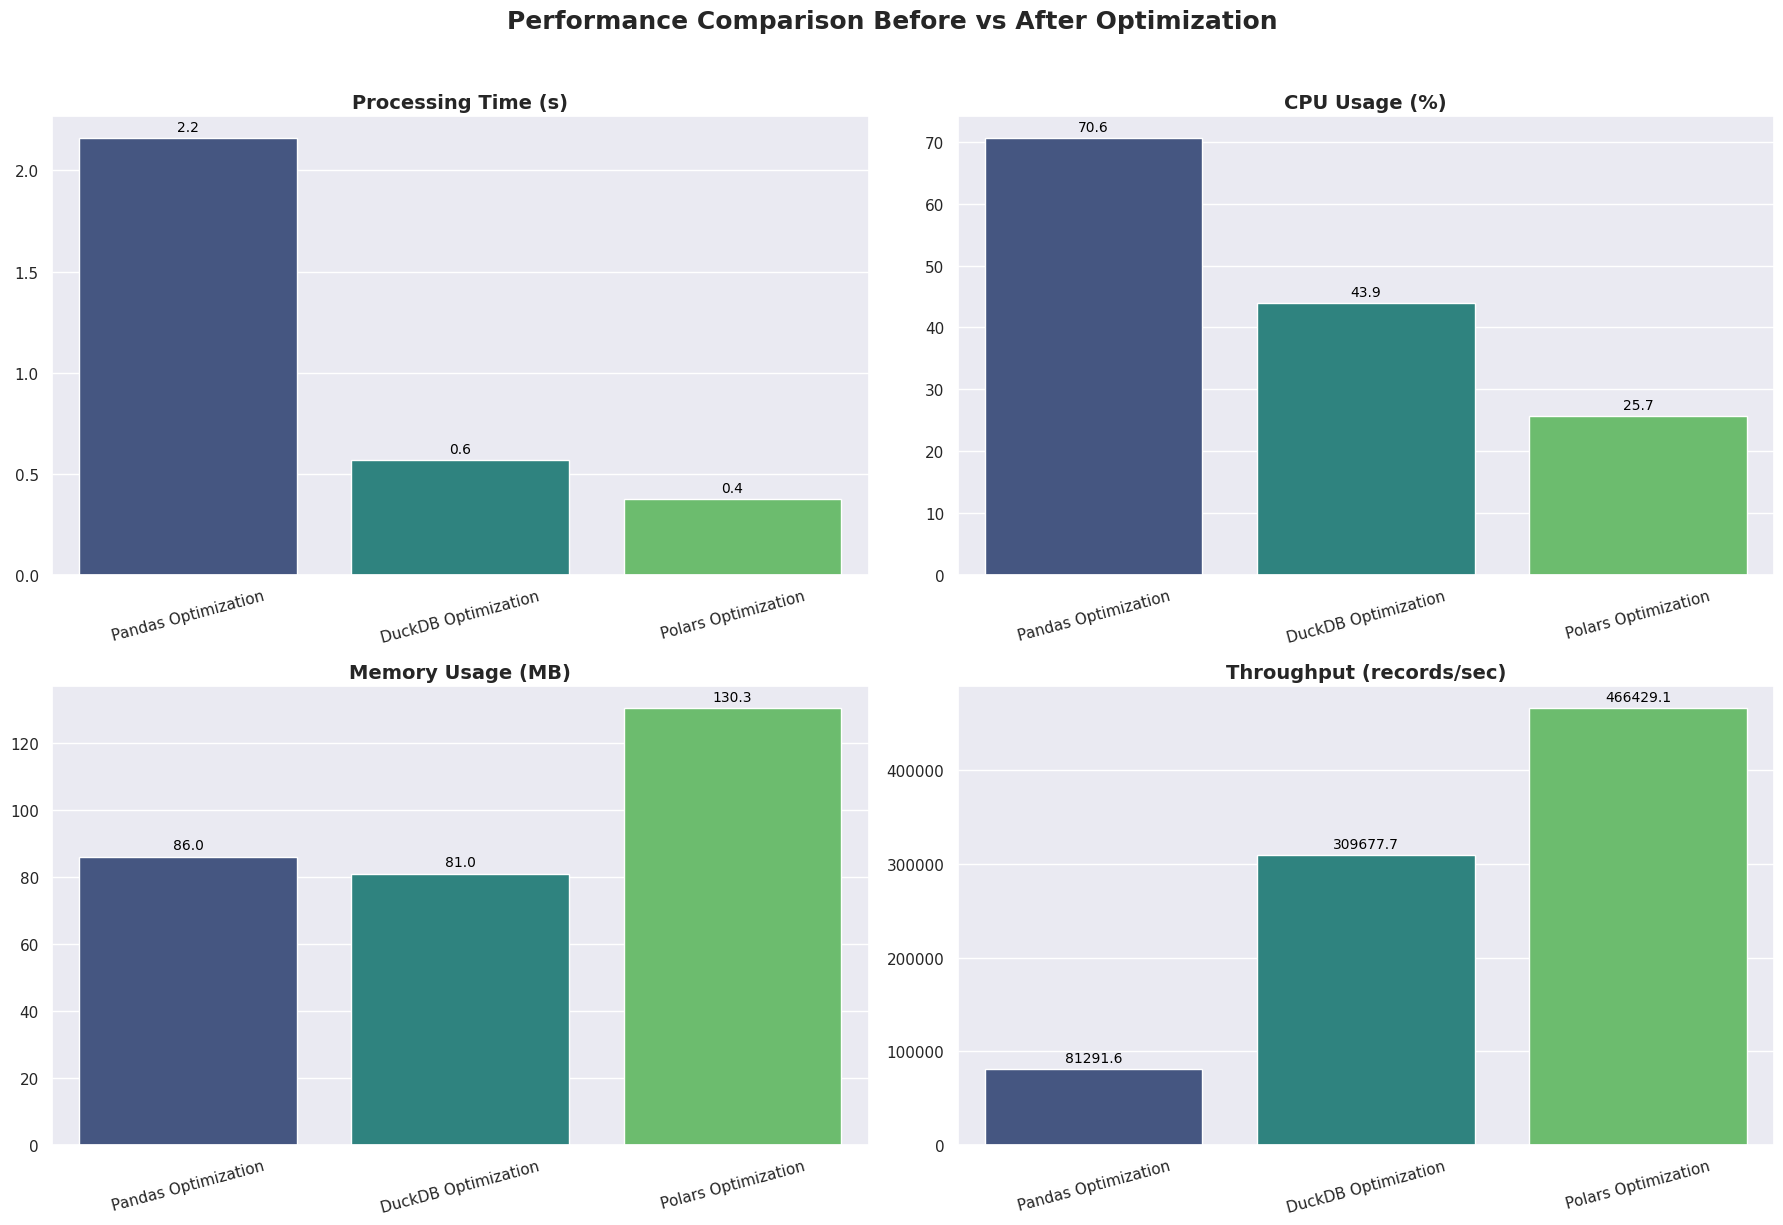

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()
best_optimization = {}

for i, (column, (title, preference)) in enumerate(metrics.items()):
    ax = axes[i]
    sns.barplot(
        data=df_combined,
        x="Method",
        y=column,
        hue="Method",  # Add this line
        palette=colors,
        ax=ax,
        legend=False  # Remove legend as we don't need it in this case
    )

    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", padding=3, fontsize=10, color='black')

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=15)

    # Determine the best optimization for the current metric
    grouped = df_combined.groupby("Method", observed=False)[column].mean()
    if preference == "lower is better":
        best_method = grouped.idxmin()
    elif preference == "higher is better":
        best_method = grouped.idxmax()
    best_optimization[title] = best_method

fig.suptitle("Performance Comparison Before vs After Optimization", fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Step 8: Display Best Optimization per Metric

In [20]:
for metric, best_method in best_optimization.items():
    print(f"For {metric}: {best_method}")

For Processing Time (s): Polars Optimization
For CPU Usage (%): Polars Optimization
For Memory Usage (MB): DuckDB Optimization
For Throughput (records/sec): Polars Optimization


Step 9: Display Overall Recommended Optimization

In [21]:
overall_best = Counter(best_optimization.values()).most_common(1)[0][0]
print(f"\n--- Overall Recommended Optimization (Based on Simple Majority) ---")
print(f"The most frequently identified best optimization method across all metrics is: {overall_best}")


--- Overall Recommended Optimization (Based on Simple Majority) ---
The most frequently identified best optimization method across all metrics is: Polars Optimization
